In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df=pd.read_excel("prakhar_portfolio.xlsx")

In [80]:
df.head()

,Stock Name,Quantity,Date Purchased,Purchased Price,Current Price
0,Apple,50,2023-01-15,150.0,170
1,Tesla,30,2023-02-10,700.0,750
2,Google,20,2023-03-05,2500.0,2600
3,Amazon,10,2023-04-20,3000.0,3100
4,Microsoft,40,2023-06-01,250.0,280


Pre-processing:

In [ ]:
df['Date Purchased']=pd.to_datetime(df["Date Purchased"])
df["Quantity"]=pd.to_numeric(df["Quantity"])
df["Purchased Price"]=pd.to_numeric(df["Purchased Price"])
df['Current Price']=pd.to_numeric(df["Current Price"])

In [ ]:
df["Purchased Value"]=df["Purchased Price"]*df["Quantity"].round(2)
df["Current Value"]=df["Current Price"] * df["Quantity"].round(2)

In [ ]:
df["Profit"]=df["Current Value"]-df["Purchased Value"].round(2)
df["ROI"]=((df["Profit"]/df["Purchased Value"])*100).round(2)

In [84]:
df

,Stock Name,Quantity,Date Purchased,Purchased Price,Current Price,Purchased Value,Current Value,Profit,ROI
0,Apple,50,2023-01-15,150.0,170,7500.0,8500,1000.0,13.33
1,Tesla,30,2023-02-10,700.0,750,21000.0,22500,1500.0,7.14
2,Google,20,2023-03-05,2500.0,2600,50000.0,52000,2000.0,4.00
3,Amazon,10,2023-04-20,3000.0,3100,30000.0,31000,1000.0,3.33
4,Microsoft,40,2023-06-01,250.0,280,10000.0,11200,1200.0,12.00
5,Intel,50,2023-06-05,50.0,40,2500.0,2000,-500.0,-20.00
6,Walmart,29,2023-03-13,654.5,580,18980.5,16820,-2160.5,-11.38


In [ ]:

df["Portfolio Percentage"]=((df["Current Value"]/df["Current Value"].sum())*100).round(2)


In [86]:
df

,Stock Name,Quantity,Date Purchased,Purchased Price,Current Price,Purchased Value,Current Value,Profit,ROI,Portfolio Percentage
0,Apple,50,2023-01-15,150.0,170,7500.0,8500,1000.0,13.33,5.90
1,Tesla,30,2023-02-10,700.0,750,21000.0,22500,1500.0,7.14,15.62
2,Google,20,2023-03-05,2500.0,2600,50000.0,52000,2000.0,4.00,36.11
3,Amazon,10,2023-04-20,3000.0,3100,30000.0,31000,1000.0,3.33,21.52
4,Microsoft,40,2023-06-01,250.0,280,10000.0,11200,1200.0,12.00,7.78
5,Intel,50,2023-06-05,50.0,40,2500.0,2000,-500.0,-20.00,1.39
6,Walmart,29,2023-03-13,654.5,580,18980.5,16820,-2160.5,-11.38,11.68


Text(0.5, 1.0, 'Stock Contribution in Portfolio')

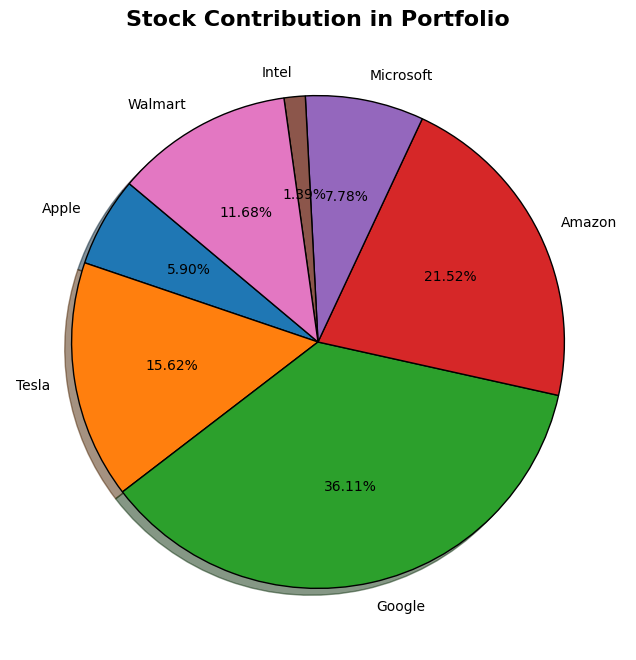

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

colors = plt.cm.Paired(range(len(df)))

ax.pie(df['Current Value'], 
       labels=df['Stock Name'], 
       startangle=140, 
       autopct='%1.2f%%', 
       wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'linestyle': 'solid'})  

ax.set_title('Stock Contribution in Portfolio', fontsize=16, fontweight='bold', color='black',)


Text(0, 0.5, 'Profit')

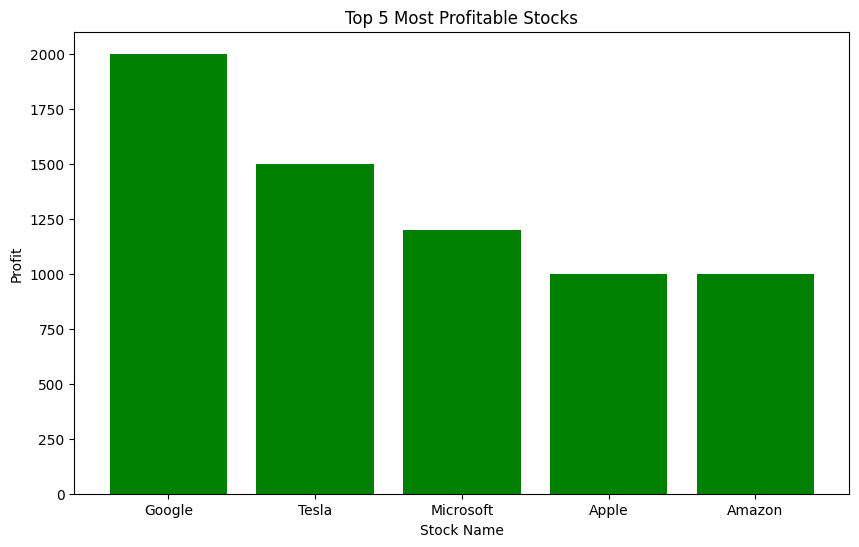

In [88]:
top_gainer_stocks = df.nlargest(5, 'Profit')
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_gainer_stocks['Stock Name'], top_gainer_stocks['Profit'], color=['green'])
ax.set_title('Top 5 Most Profitable Stocks')
ax.set_xlabel('Stock Name')
ax.set_ylabel('Profit')

Text(0, 0.5, 'Profit')

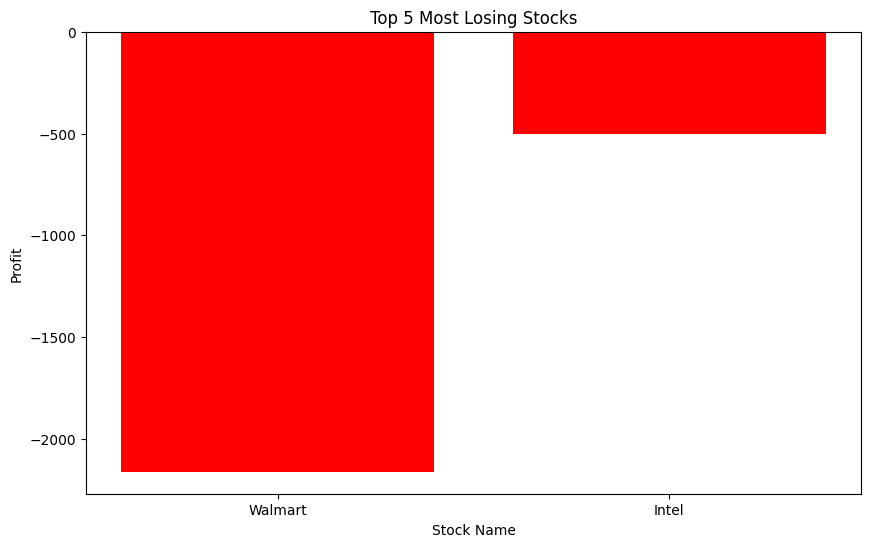

In [89]:
negative_stocks=df[(df["Current Value"]<df['Purchased Value'])]
top_loser_stocks=negative_stocks.nsmallest(5, 'Profit')
top_loser_stocks
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(top_loser_stocks['Stock Name'], top_loser_stocks['Profit'], color=['red'])
ax.set_title('Top 5 Most Losing Stocks')
ax.set_xlabel('Stock Name')
ax.set_ylabel('Profit')

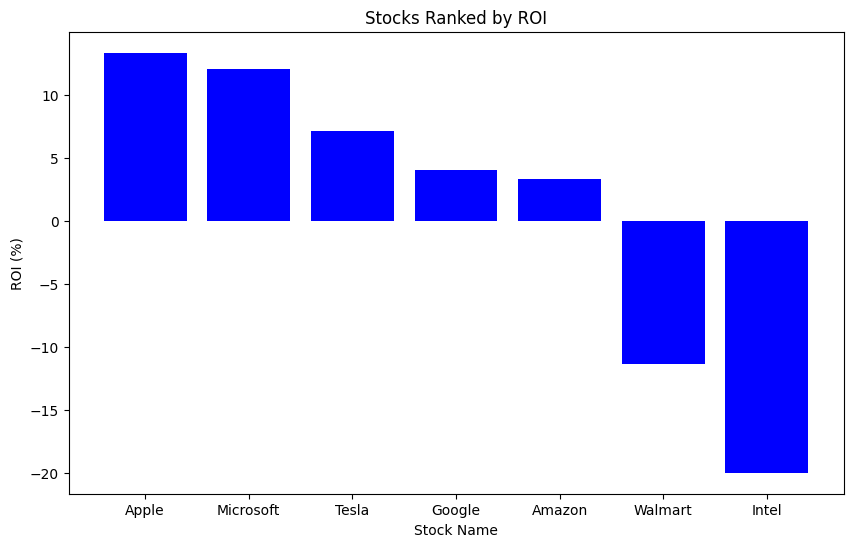

In [ ]:
RankByROI= df.sort_values(by="ROI", ascending=False)
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(RankByROI['Stock Name'], RankByROI['ROI'], color='blue')
ax.set_title('Stocks Ranked by ROI')
ax.set_xlabel('Stock Name')
ax.set_ylabel('ROI (%)')
plt.show()
